# Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [4]:
data = pd.read_csv("Datasets/dermatology_database_1.csv")
data = data.replace('?', np.nan)
data = data.dropna()

In [5]:
# data.corr()['class'].sort_values(ascending=True)

Explained variance ratio: [0.27359219 0.16169949]


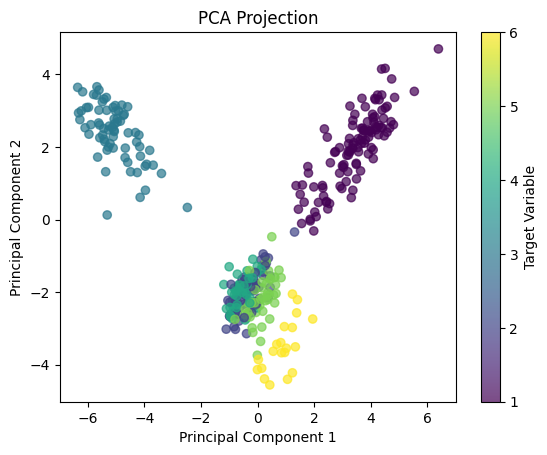

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = data

# Step 2: Separate features (X) and target (y)
X = df.iloc[:, :-1].values  # Select all columns except the last one (features)
y = df.iloc[:, -1].values  # Select the last column (target variable)

# Step 3: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Create a new DataFrame with PCA features
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y  # Add target variable back

# Step 6: Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 7 (Optional): Visualize the results
import matplotlib.pyplot as plt

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Target'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.colorbar(label="Target Variable")
plt.show()

Explained variance ratio: [0.27359219 0.16169949]


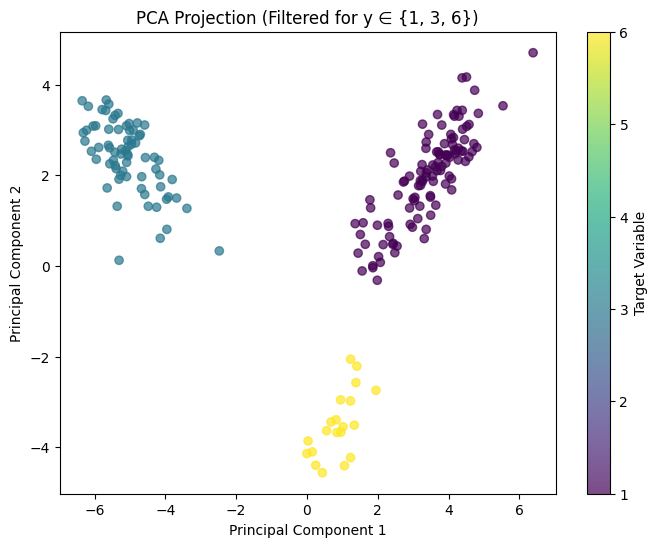

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assume df is already defined
df = data

# Step 2: Separate features (X) and target (y)
X = df.iloc[:, :-1].values  # Select all columns except the last one (features)
y = df.iloc[:, -1].values   # Select the last column (target variable)

# Step 3: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Create a new DataFrame with PCA features
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y  # Add target variable back

# Step 6: Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 7: Filter data where target variable y is in [1, 3, 6]
df_filtered = df_pca[df_pca['Target'].isin([1, 3, 6])]

# Step 8: Visualize the filtered results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_filtered['PC1'], df_filtered['PC2'], 
                      c=df_filtered['Target'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (Filtered for y ∈ {1, 3, 6})')

# Add color bar legend
cbar = plt.colorbar(scatter)
cbar.set_label("Target Variable")

plt.show()

In [96]:
df_filtered['Target'].value_counts()

Target
1    111
3     71
6     20
Name: count, dtype: int64

# train test val split

In [21]:
X = df_filtered[['PC1', 'PC2']].values
X = np.c_[np.ones(X.shape[0]), X]
y = df_filtered[['Target']].values.squeeze()
mapping = {1: 0, 3: 1, 6: 2}
y_transformed = np.vectorize(mapping.get)(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((161, 3), (20, 3), (21, 3), (161,), (20,), (21,))

# Softmax regression

In [25]:
def one_hot_encoding(y, c):
    matrix = np.zeros((len(y), c))
    index = np.arange(len(y))
    matrix[index, y] = 1
    return matrix

y_train_one_hot = one_hot_encoding(y_train, 3)  
y_train_one_hot.shape

(161, 3)

In [29]:
def calculate_z(X_train, W):
    # X=(m, n) ; W=(n, c)  
    z = np.dot(X_train, W) # z = (m, c)
    return z

W = np.random.rand(3,3)
z = calculate_z(X_train, W)
z.shape


(161, 3)

In [39]:
def calculate_softmax(z):
    y_hat = np.exp(z) / np.sum(np.exp(z), axis = 1, keepdims=True)
    return y_hat

y_prob = calculate_softmax(z)
y_hat = np.argmax(y_prob, axis=1)
y_prob.shape, y_hat.shape

((161, 3), (161,))

In [33]:
def calculate_loss_function(y_one_hot, y_hat):
    loss = -np.sum(y_one_hot * np.log(y_hat)) / y_one_hot.shape[0]
    return loss 

loss = calculate_loss_function(y_train_one_hot, y_prob)
loss

0.5083574828382618

In [34]:
def calculate_gradient(y_one_hot, y_hat, X_train):
    m = X.shape[0]
    grad = np.dot(X_train.T, (y_hat - y_one_hot)) / m
    return grad

grad = calculate_gradient(y_train_one_hot, y_prob, X_train)
grad.shape

(3, 3)

In [35]:
def update_weights(W, grad, lr):
    W = W - lr * grad
    return W

W = update_weights(W, grad, 0.01)
W.shape

(3, 3)

In [45]:
epochs = 300
lr = 0.1
batch_size = 10
c = 3
W = np.random.rand(3,3)

## Train

Epoch 1/300, loss: 1.326921597871016, f1: 0.04444444444444445, accuracy: 0.05
Best f1: 0.04444444444444445
Epoch 2/300, loss: 0.7985615511371913, f1: 0.4166666666666667, accuracy: 0.4
Best f1: 0.4166666666666667
Epoch 3/300, loss: 0.5442470596653813, f1: 0.6506238859180036, accuracy: 0.65
Best f1: 0.6506238859180036
Epoch 4/300, loss: 0.4031722036032237, f1: 1.0, accuracy: 1.0
Best f1: 1.0
Epoch 5/300, loss: 0.31558473396603337, f1: 1.0, accuracy: 1.0
Epoch 6/300, loss: 0.25690619434975, f1: 1.0, accuracy: 1.0
Epoch 7/300, loss: 0.21532620198426453, f1: 1.0, accuracy: 1.0
Epoch 8/300, loss: 0.1845541776453844, f1: 1.0, accuracy: 1.0
Epoch 9/300, loss: 0.1609820518299786, f1: 1.0, accuracy: 1.0
Epoch 10/300, loss: 0.14241513218027152, f1: 1.0, accuracy: 1.0
Epoch 11/300, loss: 0.12745224061751576, f1: 1.0, accuracy: 1.0
Epoch 12/300, loss: 0.11516180264666248, f1: 1.0, accuracy: 1.0
Epoch 13/300, loss: 0.10490283357050019, f1: 1.0, accuracy: 1.0
Epoch 14/300, loss: 0.09622116297567794, 

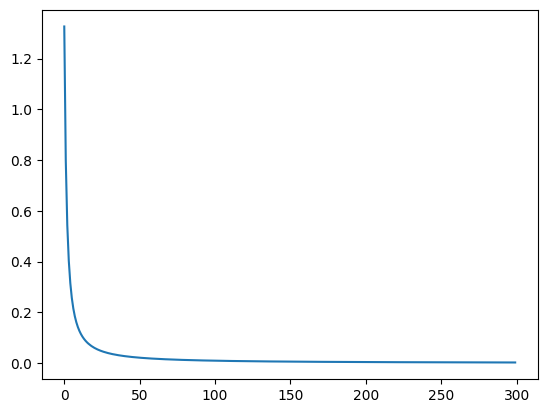

In [46]:
def train(X_train, y_train, X_val, y_val, W, epochs, lr, batch_size):
    lossess = []
    best_f1 = 0
    best_w = W
    for epoch in range(epochs):
        for i in range(0, len(y_train), batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            y_batch_one_hot = one_hot_encoding(y_batch, c)

            z = calculate_z(X_batch, W)
            y_prob_train = calculate_softmax(z)
            loss = calculate_loss_function(y_batch_one_hot, y_prob_train)
            grad = calculate_gradient(y_batch_one_hot, y_prob_train, X_batch)
            W = update_weights(W, grad, lr)
        
        lossess.append(loss)

        # Validation loop
        z_val = calculate_z(X_val, W)
        y_prob_val = calculate_softmax(z_val)
        y_hat = np.argmax(y_prob_val, axis=1)
        
        f1 = f1_score(y_val, y_hat, average= 'macro')
        accuracy = accuracy_score(y_val, y_hat)

        print(f'Epoch {epoch + 1}/{epochs}, loss: {loss}, f1: {f1}, accuracy: {accuracy}')
        
        if f1 > best_f1:
            best_f1 = f1
            best_w = W
            print(f"Best f1: {best_f1}")

    return best_w, lossess


best_w, lossess = train(X_train, y_train, X_val, y_val, W, epochs, lr, batch_size)
best_w
plt.plot(lossess)


# Evaluate

In [51]:
z_test = calculate_z(X_test, best_w)
y_prob_test = calculate_softmax(z_test)
y_hat = np.argmax(y_prob_test, axis=1)

f1_macro = f1_score(y_test, y_hat, average= 'macro')
f1_micro = f1_score(y_test, y_hat, average= 'micro')
f1_weighted = f1_score(y_test, y_hat, average= 'weighted')

f1_macro, f1_micro, f1_weighted

(1.0, 1.0, 1.0)

# Plot

In [149]:
z_values = calculate_z(X_train, best_w)
y_prob = calculate_softmax(z_values)
y_hat = np.argmax(y_prob, axis=1)
w = best_w


In [114]:
# Extract x1 (GRE Score) and x2 (CGPA)
x1 = X_train[:, 1]  
x2 = X_train[:, 2]  
y_true = y_train  # True labels (0 or 1)

In [188]:
# Set colors based on y values
colors = {0:'red', 1:'green', 2:'blue'}
colors = np.vectorize(colors.get)(y_true)
colors

array(['green', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red',
       'green', 'red', 'red', 'red', 'green', 'green', 'green', 'blue',
       'red', 'red', 'green', 'red', 'green', 'red', 'green', 'red',
       'red', 'blue', 'red', 'green', 'red', 'red', 'red', 'green',
       'green', 'green', 'red', 'green', 'green', 'red', 'red', 'green',
       'blue', 'blue', 'red', 'green', 'green', 'red', 'red', 'blue',
       'green', 'red', 'green', 'red', 'green', 'red', 'red', 'red',
       'green', 'red', 'green', 'red', 'blue', 'red', 'red', 'red',
       'blue', 'green', 'red', 'red', 'red', 'red', 'red', 'green', 'red',
       'red', 'red', 'green', 'blue', 'blue', 'red', 'red', 'red', 'red',
       'green', 'red', 'green', 'green', 'red', 'red', 'red', 'green',
       'red', 'red', 'green', 'red', 'green', 'green', 'green', 'green',
       'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'green', 'red',
       'red', 'green', 'red', 'red', 'green', 'red', 'blue', 'red', 'r

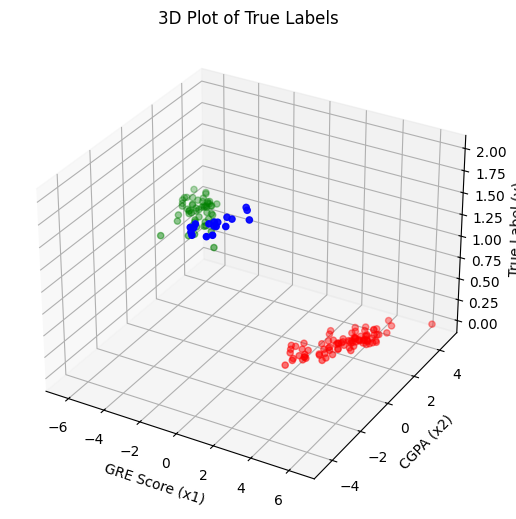

In [116]:
# Create a figure with two 3D subplots
fig = plt.figure(figsize=(10, 6))

### 🔹 Subplot 1: True Labels in 3D ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, y_true, c=colors, marker='o')

# Labels & Title
ax1.set_xlabel("GRE Score (x1)")
ax1.set_ylabel("CGPA (x2)")
ax1.set_zlabel("True Label (y)")
ax1.set_title("3D Plot of True Labels")

# Show plot
plt.tight_layout()
plt.show()

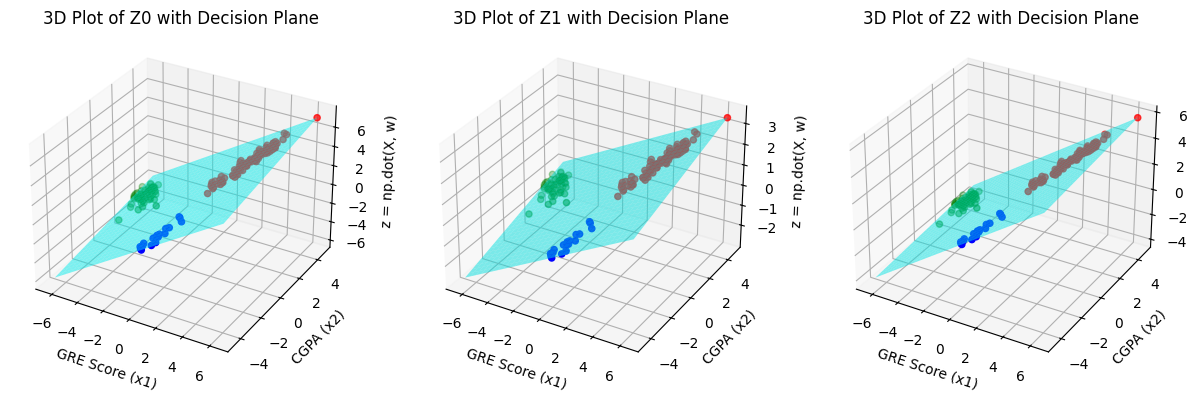

In [203]:
# Create a figure with two 3D subplots

fig = plt.figure(figsize=(15, 6))

for i in range(z_values.shape[1]):
    axi = fig.add_subplot(131+i, projection='3d')
    axi.scatter(x1, x2, z_values[:,i], c=colors, marker='o', label="Data Points")

    # Create a meshgrid for the decision plane
    x1_range = np.linspace(min(x1), max(x1), 30)
    x2_range = np.linspace(min(x2), max(x2), 30)
    X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)
    
    # Remember to add the bias term if needed.
    grid = np.c_[np.ones(X1_mesh.ravel().shape), X1_mesh.ravel(), X2_mesh.ravel()]

    # 3. Compute the z-values and softmax probabilities for each grid point.
    z_values_grid = calculate_z(grid, best_w)
    z_plane_i = z_values_grid[:,i].reshape(X1_mesh.shape)

    # Compute z-plane (decision boundary)
    axi.plot_surface(X1_mesh, X2_mesh, z_plane_i, color='cyan', alpha=0.5)

    # Labels & Title
    axi.set_xlabel("GRE Score (x1)")
    axi.set_ylabel("CGPA (x2)")
    axi.set_zlabel("z = np.dot(X, w)")
    axi.set_title(f"3D Plot of Z{i} with Decision Plane")

# Show plot
plt.show()

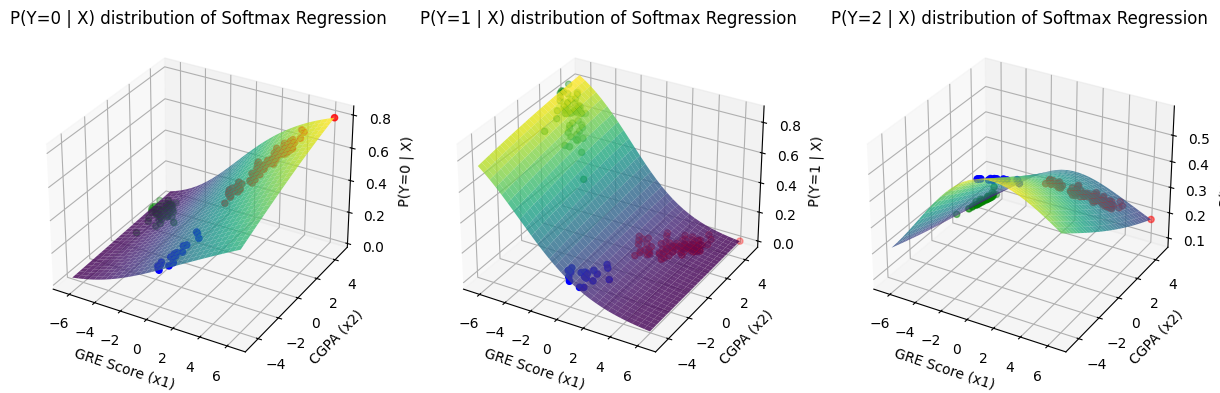

In [207]:
# Create a meshgrid for the decision plane
x1_range = np.linspace(min(x1), max(x1), 30)
x2_range = np.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Compute Z values (logit function)
# Remember to add the bias term if needed.
grid = np.c_[np.ones(X1_mesh.ravel().shape), X1_mesh.ravel(), X2_mesh.ravel()]

# 3. Compute the z-values and softmax probabilities for each grid point.
z_values_grid = calculate_z(grid, best_w)
P_Y_given_X = calculate_softmax(z_values_grid)  # Apply sigmoid

fig = plt.figure(figsize=(15, 6))

for i in range(z_values.shape[1]):
    P_yi_given_X = P_Y_given_X[:,i].reshape(X1_mesh.shape)

    # Plot 3D surface
    ax = fig.add_subplot(131+i, projection='3d')
    ax.plot_surface(X1_mesh, X2_mesh, P_yi_given_X, cmap='viridis', alpha=0.8)
    ax.scatter(x1, x2, y_prob[:,i], c=colors, marker='o', label="Data Points")

    # Labels
    ax.set_xlabel("GRE Score (x1)")
    ax.set_ylabel("CGPA (x2)")
    ax.set_zlabel(f"P(Y={i} | X)")
    ax.set_title(f"P(Y={i} | X) distribution of Softmax Regression")

plt.show()

/var/folders/tj/fhptpgmj2dv2nwb43c0_06540000gp/T/ipykernel_9813/683940915.py:26: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, boundary_ij, levels=[0], colors='red', linewidths=2, label='i vs j')
/var/folders/tj/fhptpgmj2dv2nwb43c0_06540000gp/T/ipykernel_9813/683940915.py:27: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, boundary_jk, levels=[0], colors='green', linewidths=2, label='j vs k')
/var/folders/tj/fhptpgmj2dv2nwb43c0_06540000gp/T/ipykernel_9813/683940915.py:28: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, boundary_ik, levels=[0], colors='blue', linewidths=2, label='i vs k')


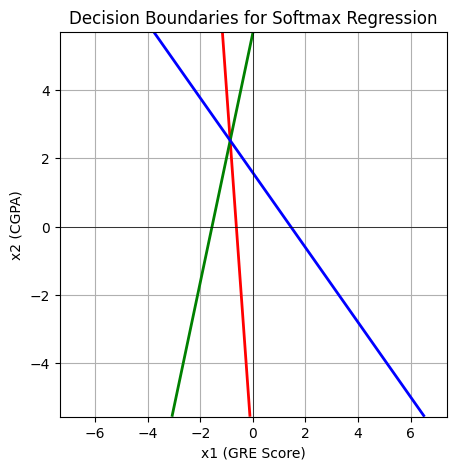

In [185]:
# Define a grid for plotting
x1_min, x1_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
x2_min, x2_max = X_train[:, 2].min() - 1, X_train[:, 2].max() + 1
X1, X2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                     np.linspace(x2_min, x2_max, 200))

# 2. Flatten the grid and create an input matrix for evaluation.
# Remember to add the bias term if needed.
grid = np.c_[np.ones(X1.ravel().shape), X1.ravel(), X2.ravel()]

# 3. Compute the z-values and softmax probabilities for each grid point.
z_values_grid = calculate_z(grid, best_w)

# Compute decision boundaries
boundary_ij = z_values_grid[:,0] - z_values_grid[:,1]  # (w_i - w_j) * x = 0 
boundary_jk = z_values_grid[:,1] - z_values_grid[:,2]  # (w_j - w_k) * x = 0
boundary_ik = z_values_grid[:,0] - z_values_grid[:,2]  # (w_i - w_k) * x = 0

# Reshape to match the grid shape (200, 200)
boundary_ij = boundary_ij.reshape(X1.shape)
boundary_jk = boundary_jk.reshape(X1.shape)
boundary_ik = boundary_ik.reshape(X1.shape)

# Plot decision boundaries
plt.figure(figsize=(5,5))
plt.contour(X1, X2, boundary_ij, levels=[0], colors='red', linewidths=2, label='i vs j')
plt.contour(X1, X2, boundary_jk, levels=[0], colors='green', linewidths=2, label='j vs k')
plt.contour(X1, X2, boundary_ik, levels=[0], colors='blue', linewidths=2, label='i vs k')

# Styling
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("x1 (GRE Score)")
plt.ylabel("x2 (CGPA)")
plt.grid()
plt.title('Decision Boundaries for Softmax Regression')

# Show plot
plt.show()

/var/folders/tj/fhptpgmj2dv2nwb43c0_06540000gp/T/ipykernel_9813/1375746446.py:30: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, boundary_ij, levels=[0], colors='red', linewidths=2, label='i vs j')
/var/folders/tj/fhptpgmj2dv2nwb43c0_06540000gp/T/ipykernel_9813/1375746446.py:31: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, boundary_jk, levels=[0], colors='green', linewidths=2, label='j vs k')
/var/folders/tj/fhptpgmj2dv2nwb43c0_06540000gp/T/ipykernel_9813/1375746446.py:32: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, boundary_ik, levels=[0], colors='blue', linewidths=2, label='i vs k')
/var/folders/tj/fhptpgmj2dv2nwb43c0_06540000gp/T/ipykernel_9813/1375746446.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:, 1], X_train[:, 2], c=colors, edgecolors='k', cmap=plt.cm.RdYlBu)


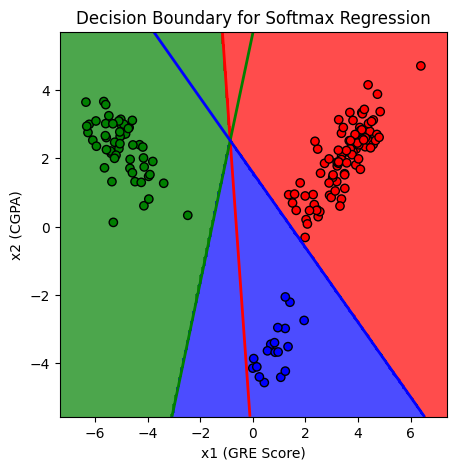

In [209]:
from matplotlib.colors import ListedColormap

# Define a grid for plotting
x1_min, x1_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
x2_min, x2_max = X_train[:, 2].min() - 1, X_train[:, 2].max() + 1
X1, X2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                     np.linspace(x2_min, x2_max, 200))

#-----------------------Decision Boundary--------------------------

# 2. Flatten the grid and create an input matrix for evaluation.
# Remember to add the bias term if needed.
grid = np.c_[np.ones(X1.ravel().shape), X1.ravel(), X2.ravel()]

# 3. Compute the z-values and softmax probabilities for each grid point.
z_values_grid = calculate_z(grid, best_w)

# Compute decision boundaries
boundary_ij = z_values_grid[:,0] - z_values_grid[:,1]  # (w_i - w_j) * x = 0 
boundary_jk = z_values_grid[:,1] - z_values_grid[:,2]  # (w_j - w_k) * x = 0
boundary_ik = z_values_grid[:,0] - z_values_grid[:,2]  # (w_i - w_k) * x = 0

# Reshape to match the grid shape (200, 200)
boundary_ij = boundary_ij.reshape(X1.shape)
boundary_jk = boundary_jk.reshape(X1.shape)
boundary_ik = boundary_ik.reshape(X1.shape)

# Plot decision boundaries
plt.figure(figsize=(5,5))
plt.contour(X1, X2, boundary_ij, levels=[0], colors='red', linewidths=2, label='i vs j')
plt.contour(X1, X2, boundary_jk, levels=[0], colors='green', linewidths=2, label='j vs k')
plt.contour(X1, X2, boundary_ik, levels=[0], colors='blue', linewidths=2, label='i vs k')


#-----------------------Decision Region--------------------------

# 4. Get the predicted class for each grid point.
y_pred_grid = np.argmax(z_values_grid, axis=1)

# 5. Reshape predictions to match the meshgrid shape.
y_pred_grid = y_pred_grid.reshape(X1.shape)

# 6. Plot the decision boundary using plt.contourf.

# Use this custom colormap in your contourf call:
custom_cmap = ListedColormap(['red', 'green', 'blue'])
plt.contourf(X1, X2, y_pred_grid, cmap=custom_cmap, alpha=0.7)


#-----------------------Dataset--------------------------

plt.scatter(X_train[:, 1], X_train[:, 2], c=colors, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.xlabel("x1 (GRE Score)")
plt.ylabel("x2 (CGPA)")
# plt.grid()
plt.title("Decision Boundary for Softmax Regression")
plt.show()